In [1]:
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.optimize as opt;

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
np.random.seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
# Note there are 2 different phis used:
#   - phi_circle (the angle of the center of the circle in r-phi plane)
#   - phi_track (the direction of the particle that made the track) 
#
#  For positive tracks: phi_circle = phi_track - pi/2
#  For negative tracks: phi_circle = phi_track + pi/2
from TrackHelper import getPhiCircle
from TrackHelper import drawTrack

In [4]:
from simpleDetectorGeo import simpleDetectorGeo

In [5]:
rDet = np.array([0.5, 1.0, 1.5, 2, 2.5,3.0])


In [6]:
detGeo = simpleDetectorGeo(rDet)


/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:39: RuntimeWarning: invalid value encountered in sqrt
  yp = yc+np.sqrt(r**2-(x-xc)**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:41: RuntimeWarning: invalid value encountered in sqrt
  ym = yc-np.sqrt(r**2-(x-xc)**2)


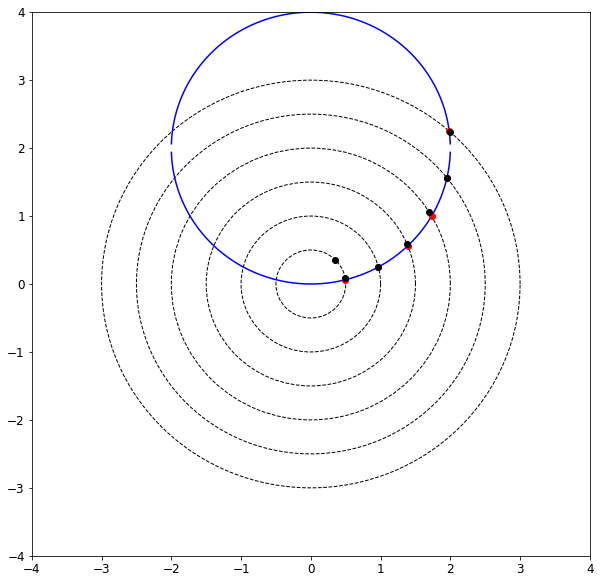

In [7]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
detGeo.drawDetector(ax)
 
# Amount of noise in dS    
dS = 0.05
    
for pt in [2]:
    for phi in [0]:
        #drawTrack(pt,phi,+1)
        #xs, ys, layerIDs, becs = detGeo.getHits(pt,phi,+1)
        #plt.plot(xs,ys,'ro')
        
        
        drawTrack(pt,phi,-1)        
        xs, ys, layerIDs, becs = detGeo.getHits(pt,phi,-1)        

        
        phis_t = np.arctan2(ys,xs)
        rs_t = np.sqrt(np.array(ys)**2 + np.array(xs)**2)

        phis_noise = phis_t + dS/rs_t*np.random.randn(len(xs))
        xs_noise = rs_t * np.cos(phis_noise)
        ys_noise = rs_t * np.sin(phis_noise)        
        xs_noise = np.append([0.5*np.cos(np.pi/4)],xs_noise)
        ys_noise = np.append([0.5*np.cos(np.pi/4)],ys_noise)

        plt.plot(xs,ys,'ro')
        plt.plot(xs_noise,ys_noise,'ko')
                

#plt.show()

[2.24814117 0.11369966 1.        ]
2
[-0.28411975  0.02631372  0.10525706  0.09624007  0.04580943  0.28951844
 -0.00942873]


/Users/johnda/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


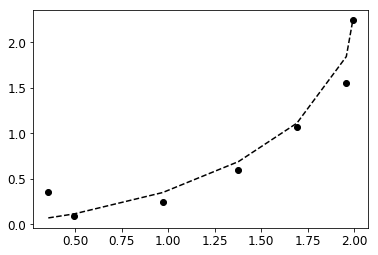

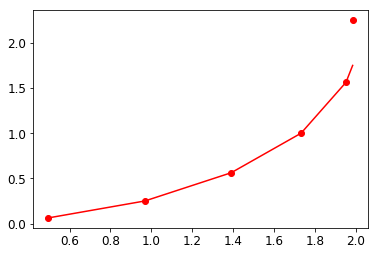

In [8]:
from scipy import optimize

# This is the function we are trying to fit to the data.
def funcYvsX(x, rc, phi, q):
    #return rc*x+phi
    if q < 0:
        d = rc**2-(x-rc*np.cos(phi+np.pi/2))**2
        #print("Was:",d)
        d[d<0]=0#-1e-3
        #print("Now:",d)
        return rc*np.sin(phi+np.pi/2)-np.sqrt(d)
    if q > 0:
        return rc*np.sin(phi-np.pi/2)-np.sqrt(rc**2-(x-rc*np.cos(phi-np.pi/2))**2) 

# This is the function we are trying to fit to the data.
def fitFun(p, x):
    #return rc*x+phi
    d = p[0]**2-(x-p[0]*np.cos(p[1]+np.pi/2))**2
    return p[0]*np.sin(p[1]+np.pi/2)-np.sqrt(d)


def errFun(p, x, y):
    return fitFun(p, x) - y 
    
#def func(x, a, b, c):
#     return a * np.exp(-b * x) + c    
    
#plt.plot(xs_noise,ys_noise,'ko')
#optimizedParameters, pcov = opt.curve_fit(funcYvsX, xs_noise, ys_noise, p0=[2.9, 0, -1])
#plt.plot(xs_noise, funcYvsX(xs_noise, *optimizedParameters))


plt.plot(xs_noise,ys_noise,'ko')
p0 = [ 1e3, 0.*np.pi , +1]
p1,success = optimize.leastsq(errFun, p0[:], args=(xs_noise, ys_noise))
print(p1)
print(success)
plt.plot(xs_noise, fitFun(p1, xs_noise),"k--")
print(errFun(p1, xs_noise, ys_noise))
plt.show()

plt.plot(xs, ys,"ro")
pTrue = [2,0,+1]

plt.plot(xs, fitFun(pTrue, xs),"r-")
plt.show()
#plt.plot(xdata, funcYvsX(xdata, *[5,0]))


1
[ 1.06768492 -0.21547099  1.        ]


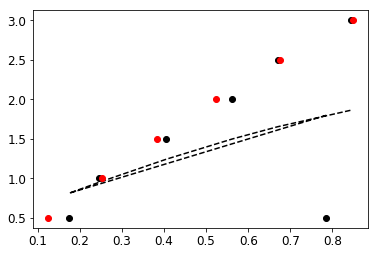

[ 0.79700612  1.30134216  1.73545668  1.5424298   0.94976368  0.2047831
 -0.52660753]


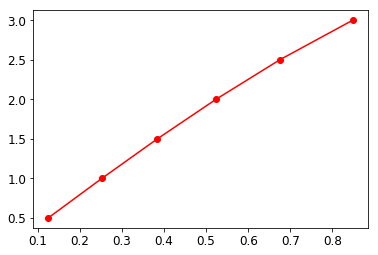

In [16]:
# This is the function we are trying to fit to the data.
def fitFunRPhi(p, x):
    return 2*p[0]*(np.cos(x-(p[1]+np.pi/2)))

def errFunRPhi(p, x, y):
    return fitFunRPhi(p, x) - y
    
def chi2FunRPhi(p, x, y, err=0.01):
    return ((fitFunRPhi(p, x) - y)/err)**2

phis_h = np.arctan2(ys_noise,xs_noise)
rs_h  = np.sqrt(xs_noise**2 + ys_noise**2)
plt.plot(phis_h,rs_h,"ko")

p0 = [ 1e3, 0, +1]

p1,success = optimize.leastsq(chi2FunRPhi, p0[:], args=(phis_h, rs_h))
print(success)
plt.plot(phis_h, fitFunRPhi(p1, phis_h),"k--")
plt.plot(phis_t, rs_t,"ro")
print(p1)
plt.show()

plt.plot(phis_t, rs_t,"ro")
plt.plot(phis_t, fitFunRPhi([2,0], phis_t),"r-")
print(errFunRPhi(p1, xs_noise, ys_noise))


[0.5 1.  1.5 2.  2.5 3. ]
[0.125 0.25  0.375 0.5   0.625 0.75 ]
[1.4454685  1.31811607 1.18639955 1.04719755 0.89566479 0.72273425]
[1.4454685  1.31811607 1.18639955 1.04719755 0.89566479 0.72273425]
[3.01626482 2.8889124  2.75719588 2.61799388 2.46646112 2.29353057]
phi:
[0.12532783 0.25268026 0.38439677 0.52359878 0.67513153 0.84806206]
[-1.4454685  -1.31811607 -1.18639956 -1.04719755 -0.89566479 -0.72273426]
[0.125      0.25       0.37499999 0.5        0.625      0.74999999]
[1.4454685  1.31811607 1.18639956 1.04719755 0.89566479 0.72273426]


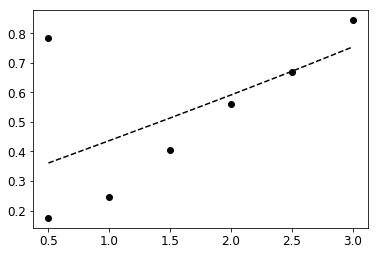

In [10]:
def fitFunPhiR(p, x):
    return -np.arccos(x/(2*p[0]))+p[1]+np.pi/2

def errFunPhiR(p, x, y):
    return fitFunPhiR(p, x) - y  

print(rs_t)
print(rs_t/(2*2))
print(np.arccos(rs_t/(2*2)))
print(np.arccos(rs_t/(2*2))+0)
print(np.arccos(rs_t/(2*2))+0+np.pi/2)
print("phi:")
print(phis_t)
print(phis_t-(0+np.pi/2))
print(np.cos(phis_t-(0+np.pi/2)))
print(np.arccos(np.cos(phis_t-(0+np.pi/2))))

phis_h = np.arctan2(ys_noise,xs_noise)
rs_h  = np.sqrt(xs_noise**2 + ys_noise**2)
plt.plot(rs_h,phis_h,"ko")

p0 = [  2,0]
p1,success = optimize.leastsq(errFunPhiR, p0[:], args=(rs_h, phis_h))
plt.plot(rs_h, fitFunPhiR(p1, rs_h),"k--")
plt.show()

plt.plot(rs_t, phis_t,"ro")
plt.plot(rs_t, fitFunPhiR([2,0], rs_t),"r-")


In [11]:
x = np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(x,np.cos(x))
plt.plot(x,np.arccos(np.cos(x)),"r")
plt.plot(x,x)